# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension,
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.602487e+01     1.449546e+01
 * time: 0.0017218589782714844
     1     3.413117e+01     8.514092e+00
 * time: 0.006271839141845703
     2     3.281555e+01     1.258407e+01
 * time: 0.01186990737915039
     3     2.579687e+01     8.209673e+00
 * time: 0.017465829849243164
     4     2.275766e+01     3.152595e+00
 * time: 0.022978782653808594
     5     2.029170e+01     2.593180e+00
 * time: 0.02855682373046875
     6     1.903647e+01     2.385769e+00
 * time: 0.034114837646484375
     7     1.865973e+01     2.640508e+00
 * time: 0.038736820220947266
     8     1.838819e+01     1.661581e+00
 * time: 0.04349088668823242
     9     1.801515e+01     1.021033e+00
 * time: 0.048172950744628906
    10     1.770778e+01     1.037814e+00
 * time: 0.05281782150268555
    11     1.745085e+01     8.889581e-01
 * time: 0.057446956634521484
    12     1.731831e+01     6.614428e-01
 * time: 0.062001943588256836
    13     1.729905e+01     1.307596e+0

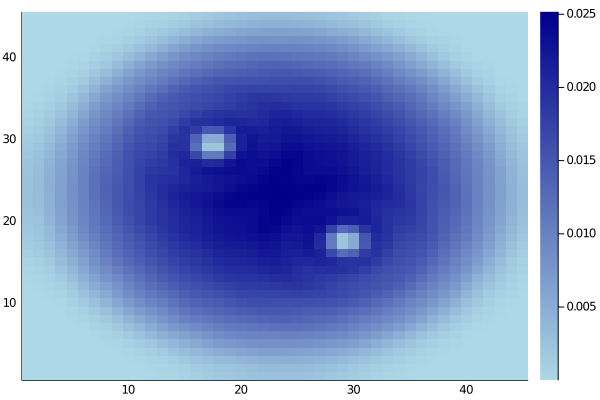

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)